# a) Aim and Requirement

Black Friday Dataset: A study of sales through consumer behaviours.

Questions: 
1. Predict the amount of purchase based on the given features? => Regression
2. How does gender or age affect the amount of purchase? => Plot
3. What are the most purchased products? => Plot (Can be done w.r.t amount and quantity)

Fields Understanding:

1. User_ID: Unique identifier for each customer.
2. Product_ID: Unique identifier for each product
3. Gender: Customer's gender 
4. Age: Customer's age range (e.g., 0-17, 18-24, 25-34, etc.).
5. Occupation: Customer's profession.
6. City_Category: Type of city the customer lives in (e.g., rural, urban, suburban).
7. Stay_In_Current_City_Years: Number of years the customer has lived in their current city.
8. Marital_Status: Customer's marital status
9. Product_Category_1: Primary category of the product
10. Product_Category_2: Secondary category
11. Product_Category_3: Tertiary category for the product
12. Purchase: amount in dollars

Understanding of Product Categories:

Example 1:
1. Product_ID = P00069042 (TV)
2. Product_Category_1 = 3 (e.g., "Electronics")
3. No Product_Category_2 or Product_Category_3 (Only belongs to Primary, no secondary or teritiary).

Example 2:
1. Product_ID =  P00248942 (Nike Shoes)
2. Product_Category_1 = 1 (e.g., "Fashion")
3. Product_Category_2 = 6 (e.g., "Footwear")
4. Product_Category_3 = 14 (e.g., "Sports Shoes")

# b) Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
df_test = pd.read_csv(r"C:\Users\srika\OneDrive\Desktop\HTC ML course\Project\Black Friday Dataset\test.csv")
df_train = pd.read_csv(r"C:\Users\srika\OneDrive\Desktop\HTC ML course\Project\Black Friday Dataset\train.csv")

In [3]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
round(df_test.isnull().sum()/df_test.shape[0] * 100,2)
#Percentage of null values

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            30.97
Product_Category_3            69.59
dtype: float64

In [5]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Train Dataset

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df_train.describe(include= 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [8]:
round(df_train.isnull().sum()/df_train.shape[0] * 100,2)
#Percentage of null values

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.57
Product_Category_3            69.67
Purchase                       0.00
dtype: float64

Inferences:

Product_categeory_2 and Product_categeory_3 have 31 and 72 percent NAN values respectively for both the datsets. 


In [9]:
df_train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

### Univariate Analysis

In [10]:
df_train['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [11]:
df_train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [12]:
df_train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

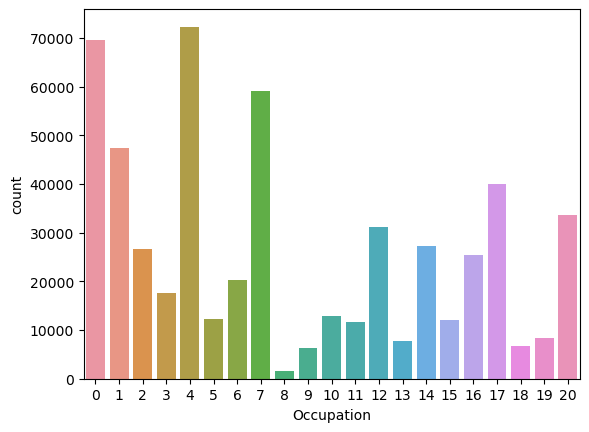

In [13]:
sns.countplot(data = df_train, x = 'Occupation')
plt.show()

In [14]:
df_train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [15]:
df_train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [16]:
df_train['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

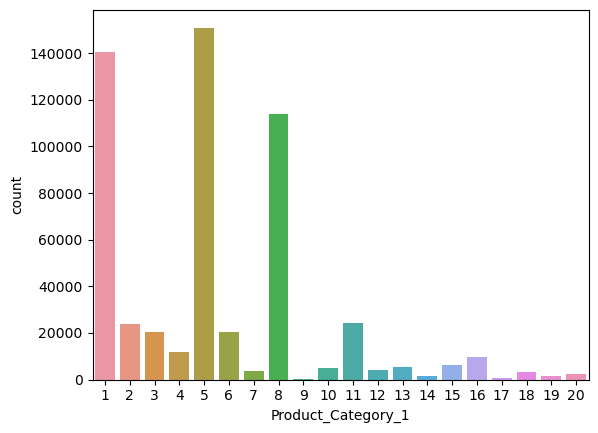

In [17]:
sns.countplot(data = df_train, x = 'Product_Category_1')
plt.show()

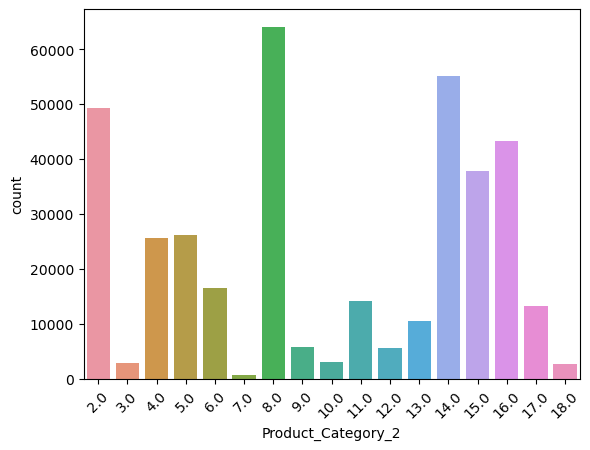

In [18]:
sns.countplot(data = df_train, x = 'Product_Category_2')
plt.xticks(rotation=45)
plt.show()

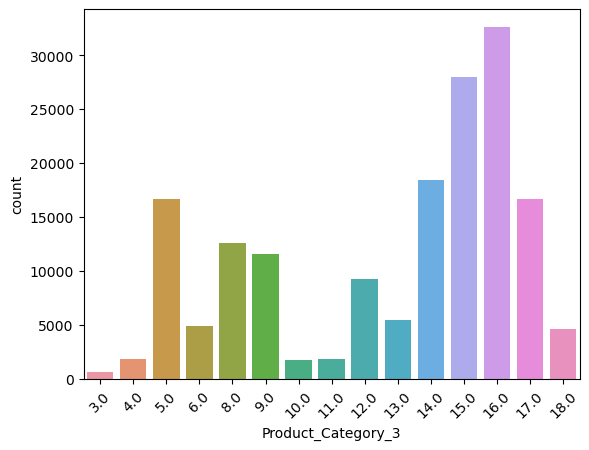

In [19]:
sns.countplot(data = df_train, x = 'Product_Category_3')
plt.xticks(rotation=45)
plt.show()

In [20]:
df_train['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

C:\Users\srika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


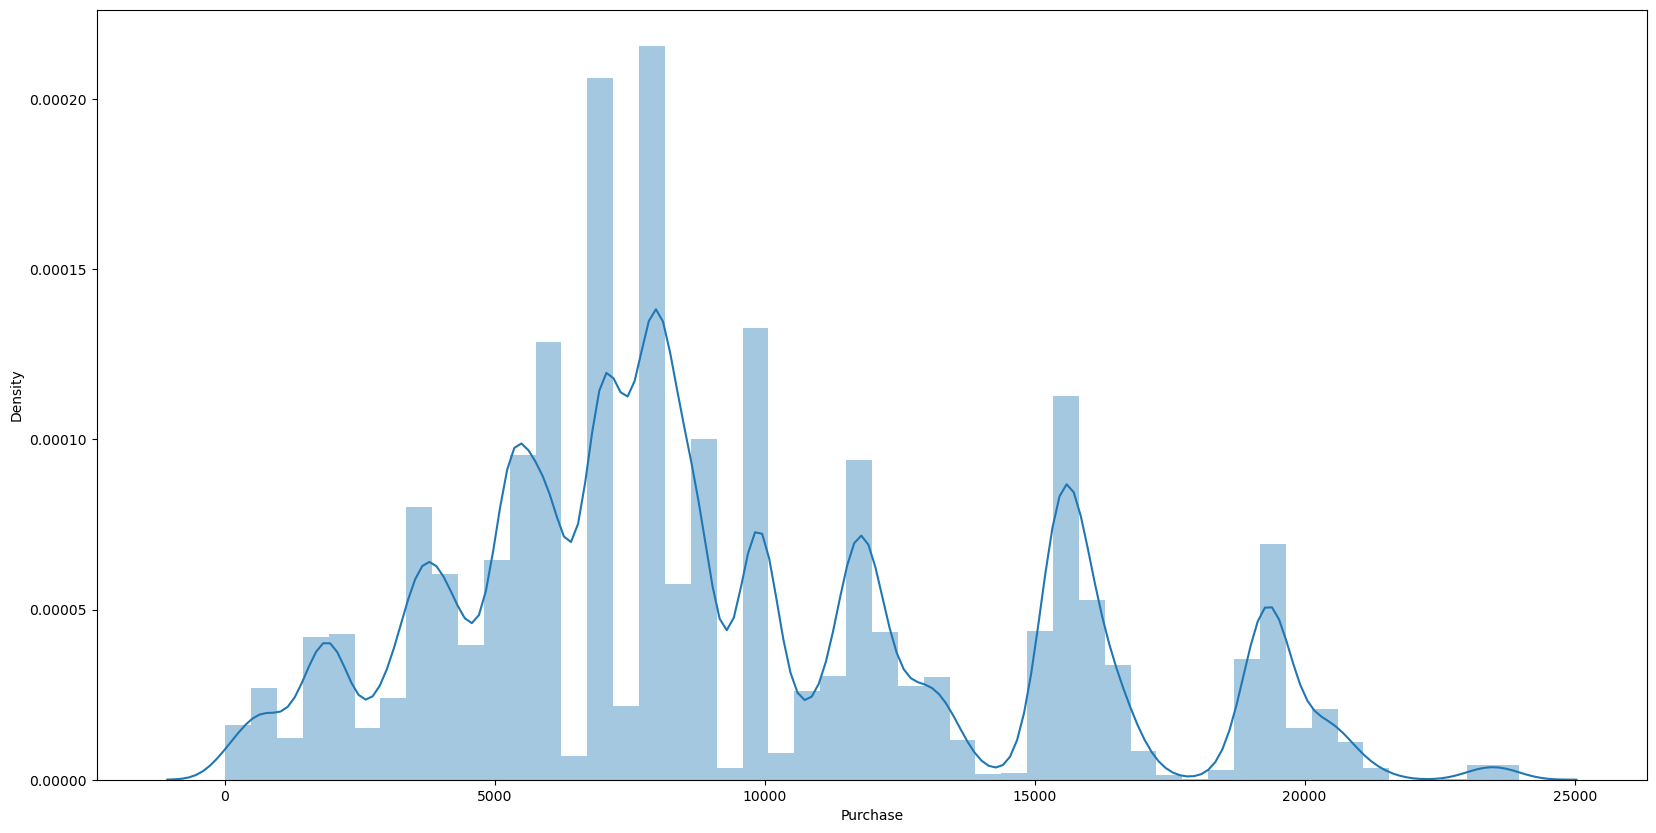

In [21]:
plt.subplots(1,1, figsize = (20, 10))
sns.distplot(df_train['Purchase'], kde = True)
plt.show()

### Bivariate analysis

#### How does gender or age affect the amount of purchase?

In [22]:
(df_train.groupby('Gender')['Purchase'].sum()/df_train['Purchase'].sum() * 100).sort_values(ascending = False)

Gender
M    76.721424
F    23.278576
Name: Purchase, dtype: float64

In [23]:
(df_train.groupby('Age')['Purchase'].sum()/df_train['Purchase'].sum() * 100).sort_values(ascending = False)

Age
26-35    39.871374
36-45    20.145361
18-25    17.933325
46-50     8.258612
51-55     7.203947
55+       3.939850
0-17      2.647530
Name: Purchase, dtype: float64

In [24]:
(df_train.groupby(['Age','Gender'])['Purchase'].sum()/df_train['Purchase'].sum() * 100).sort_values(ascending = False)

Age    Gender
26-35  M         31.178429
36-45  M         15.368126
18-25  M         13.901077
26-35  F          8.692946
46-50  M          5.968362
51-55  M          5.448270
36-45  F          4.777235
18-25  F          4.032249
55+    M          3.041411
46-50  F          2.290250
0-17   M          1.815750
51-55  F          1.755677
55+    F          0.898439
0-17   F          0.831781
Name: Purchase, dtype: float64

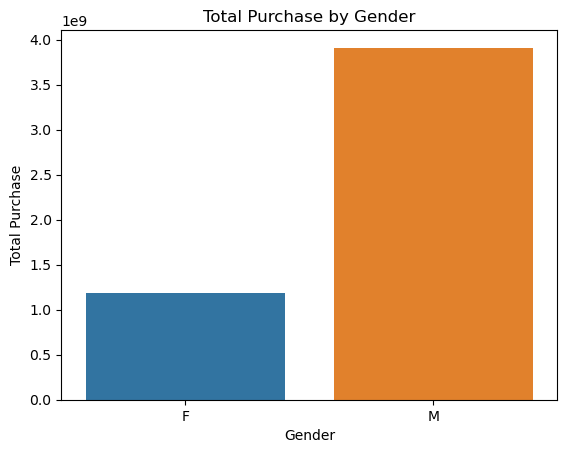

In [25]:
sns.barplot(data = df_train.groupby('Gender')['Purchase'].sum().reset_index(), x= 'Gender',y='Purchase')
plt.xlabel('Gender')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by Gender')
plt.xticks(rotation=0) 
plt.show()

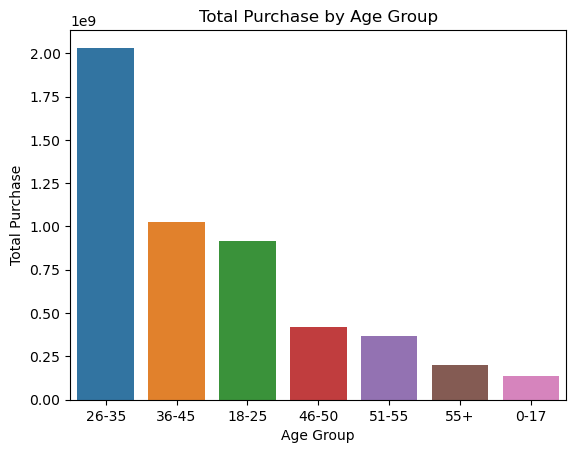

In [26]:
sns.barplot(data = df_train.groupby('Age')['Purchase'].sum().sort_values(ascending = False).reset_index(), x= 'Age',y='Purchase')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by Age Group')
plt.xticks(rotation=0) 
plt.show()

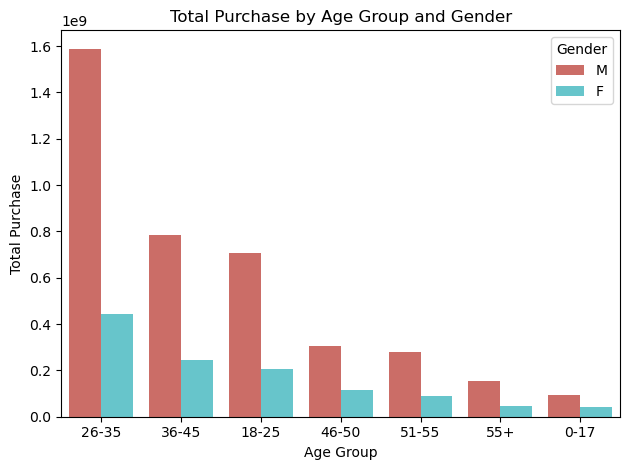

In [27]:
sns.barplot(data = df_train.groupby(['Age','Gender'])['Purchase'].sum().sort_values(ascending = False).reset_index(), x= 'Age',y='Purchase',hue= 'Gender',palette='hls')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by Age Group and Gender')
plt.xticks(rotation=0) 
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Inferences:
1. Male customers in age brackets of 26-35, 36-45 and 18 -25 have more prurchases of around 60% of total purchases.
2. Female customers in age brackets of 26-35, 36-45 and 18-25 have more purchases of around 17% of total purchases.

#### What are the most purchased products?

In [28]:
df_train['Product_ID'].value_counts(ascending = False).head(10)

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00059442    1406
P00145042    1406
Name: Product_ID, dtype: int64

In [29]:
top_10_products = df_train['Product_ID'].value_counts(ascending=False).head(10).to_frame().reset_index()
top_10_products.columns = ['Product_ID','Product_ID_Count']
top_10_products

,Product_ID,Product_ID_Count
0,P00265242,1880
1,P00025442,1615
2,P00110742,1612
3,P00112142,1562
4,P00057642,1470
5,P00184942,1440
6,P00046742,1438
7,P00058042,1422
8,P00059442,1406
9,P00145042,1406


In [30]:
total_purchase = df_train['Purchase'].sum()

In [31]:
merged_df = pd.merge(top_10_products, df_train.groupby('Product_ID')['Purchase'].sum().reset_index(),
                   on='Product_ID', how='left')

merged_df.columns = ['Product_ID', 'Product_ID_Count', 'Corresponding_Total_Purchase']

merged_df = merged_df.sort_values(by='Product_ID_Count', ascending=False)

merged_df['Percentage_of_Purchase'] = round((merged_df['Corresponding_Total_Purchase'] / total_purchase) * 100,2)

merged_df

,Product_ID,Product_ID_Count,Corresponding_Total_Purchase,Percentage_of_Purchase
0,P00265242,1880,14165515,0.28
1,P00025442,1615,27995166,0.55
2,P00110742,1612,26722309,0.52
3,P00112142,1562,24216006,0.48
4,P00057642,1470,23102780,0.45
5,P00184942,1440,24334887,0.48
6,P00046742,1438,21152882,0.42
7,P00058042,1422,12250634,0.24
8,P00059442,1406,24338343,0.48
9,P00145042,1406,20411342,0.40


In [32]:
df_train[df_train['Product_ID'] == 'P00265242']['Purchase'].unique()

array([8652, 8767, 6944, 8628, 8593, 6998, 8646, 8890, 8770, 8896, 8694,
       8761, 8568, 8689, 8714, 8864, 7127, 3752, 8788, 8882, 7180, 5237,
       8889, 8746, 7041, 8569, 7103, 8833, 6941, 8879, 7049, 7038, 3709,
       8777, 6895, 8610, 8574, 8897, 8672, 7077, 6853, 8587, 7125, 3697,
       8615, 8900, 8822, 7118, 8854, 6971, 7158, 7039, 5347, 6902, 7023,
       6959, 8850, 8570, 8834, 8611, 7087, 8600, 8881, 8732, 8674, 8621,
       8828, 8895, 7186, 8725, 7009, 8678, 8837, 5439, 8821, 8820, 6855,
       7165, 5147, 5362, 8629, 8710, 8775, 7015, 8805, 5354, 3739, 8667,
       8586, 6976, 5318, 3465, 7144, 8653, 6915, 8717, 8728, 7003, 8666,
       8677, 3472, 8862, 7157, 5256, 8754, 8618, 5444, 8682, 6861, 8808,
       6937, 6864, 8861, 5389, 1927, 8614, 8582, 6962, 6925, 7002, 8904,
       7108, 5219, 8705, 8798, 5360, 8797, 8905, 1944, 7082, 1876, 8764,
       5180, 5416, 7079, 6876, 8690, 5325, 5372, 8892, 8647, 7146, 3653,
       8688, 6965, 5239, 8836, 6960, 5193, 7065, 36

In [33]:
df_train['Purchase'].sort_values(ascending = False)

370891    23961
93016     23961
87440     23961
503697    23960
321782    23960
          ...  
546379       12
546185       12
547032       12
546181       12
549221       12
Name: Purchase, Length: 550068, dtype: int64

In [34]:
df_train[df_train['Purchase'] == 23961]['Product_ID'].nunique()

1

In [35]:
df_train[df_train['Purchase'] == 23961]['Product_ID'].unique()

array(['P00052842'], dtype=object)

In [36]:
df_train[df_train['Product_ID'] == 'P00052842']['Purchase'].sum()

19778599

In [37]:
round((df_train[df_train['Product_ID'] == 'P00052842']['Purchase'].sum()/total_purchase)*100,2)

0.39

In [38]:
df_train_product_ids = df_train[df_train['Purchase'] == 23961]['Product_ID'].unique()
merged_df_product_ids = merged_df['Product_ID'].unique()
common_product_ids = set(df_train_product_ids).intersection(set(merged_df_product_ids))
common_product_ids

set()

In [39]:
df_train.groupby('Product_ID')['Purchase'].sum().sort_values(ascending = False)

Product_ID
P00025442    27995166
P00110742    26722309
P00255842    25168963
P00059442    24338343
P00184942    24334887
               ...   
P00012942        1717
P00325342        1656
P00353042        1545
P00309042         726
P00091742         405
Name: Purchase, Length: 3631, dtype: int64

In [40]:
df_train[df_train['Product_ID'] == 249].groupby('Product_ID')['Purchase'].sum()/df_train['Purchase'].sum()*100

Series([], Name: Purchase, dtype: float64)

Inferences:
1. Top 10 products with respect to quantity
    1. P00265242
    2. P00025442
    3. P00110742
    4. P00112142
    5. P00057642
    6. P00184942
    7. P00046742
    8. P00058042
    9. P00059442
    10. P00145042

2. Top Product with respect to highest individual purchase(23961) and have contribution 0.39% in total purchase
    1. P00052842
    
3. The maximum individual contribution of Product_ID in terms of total Purcahse is 0.54% in total purcahse
    1. 249

#### How does product_categories affect purchase

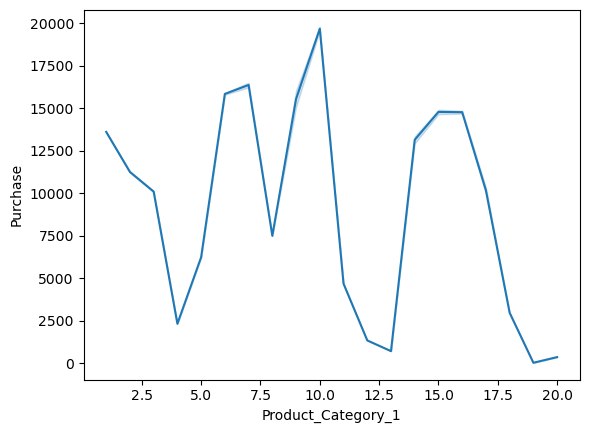

In [41]:
sns.lineplot(data = df_train, x = 'Product_Category_1', y = 'Purchase')
plt.show()

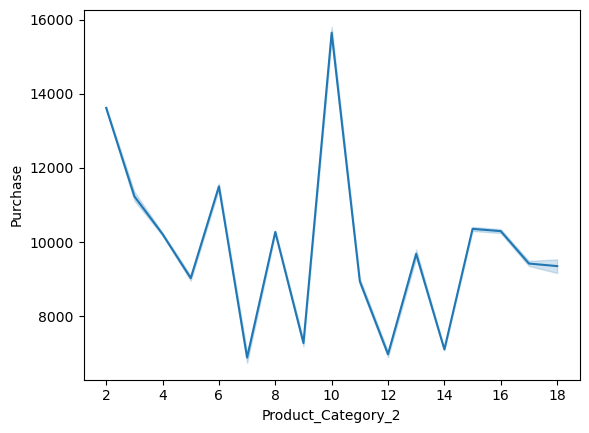

In [42]:
sns.lineplot(data = df_train, x = 'Product_Category_2', y = 'Purchase')
plt.show()

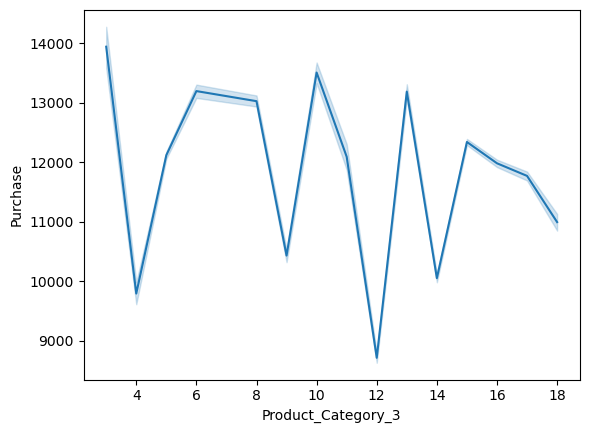

In [43]:
sns.lineplot(data = df_train, x = 'Product_Category_3', y = 'Purchase')
plt.show()

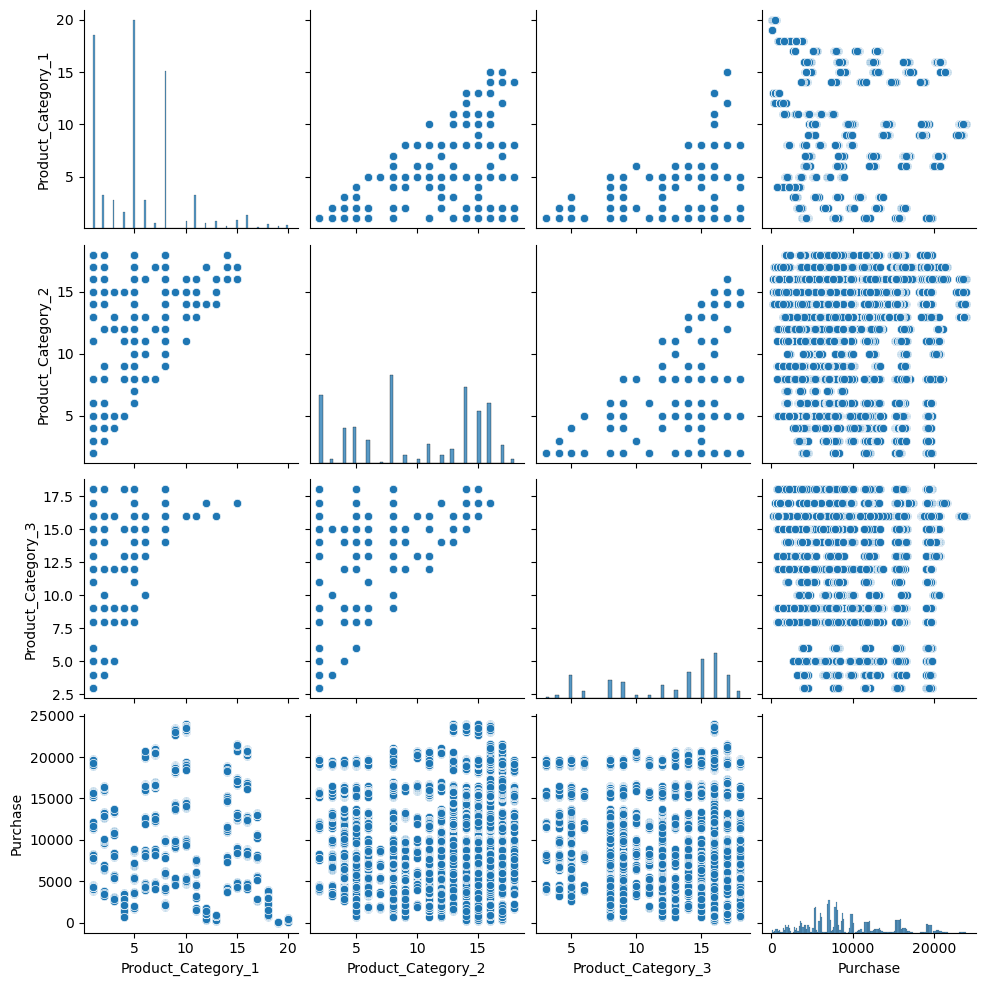

In [44]:
sns.pairplot(df_train[["Product_Category_1", "Product_Category_2", "Product_Category_3", "Purchase"]])
plt.show()

# c) Data Preprocessing

In [45]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [46]:
df_train['Product_Category_2'] = df_train['Product_Category_2'].fillna(0)

In [47]:
df_train['Product_Category_3'] = df_train['Product_Category_3'].fillna(0)

In [48]:
df_train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

## Encoding

Product_ID => label encoding

Stay_In_Current_City_Years,Age => ordinal & City_Category, Gender => nominal

In [49]:
#df_train = pd.get_dummies(df_train, columns=['Age'], prefix='Age_')
#df['Age_Encoding'] = df['Age'].replace({'0-18': 1, '19-25': 2, '26-35': 3, '36-45': 4, '46-55': 5, '55+': 6})
#df_train = pd.get_dummies(df_train, columns=['City_Category'], prefix='City_Category_')

In [50]:
df_train['Stay_In_Current_City_Years'] = pd.to_numeric(df_train['Stay_In_Current_City_Years'], errors='coerce')

In [51]:
df_train['Stay_In_Current_City_Years'] = df_train['Stay_In_Current_City_Years'].fillna(4)

In [52]:
df_train['Stay_In_Current_City_Years'].unique()

array([2., 4., 3., 1., 0.])

In [53]:
le = LabelEncoder()
df_train['City_Category'] = le.fit_transform(df_train['City_Category'])
df_train['Gender'] = le.fit_transform(df_train['Gender'])
df_train['Age'] = le.fit_transform(df_train['Age'])
df_train['Product_ID'] = le.fit_transform(df_train['Product_ID'])

In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int32  
 2   Gender                      550068 non-null  int32  
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  float64
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(3), int32(4), int64(5)
memory usage: 42.0 MB


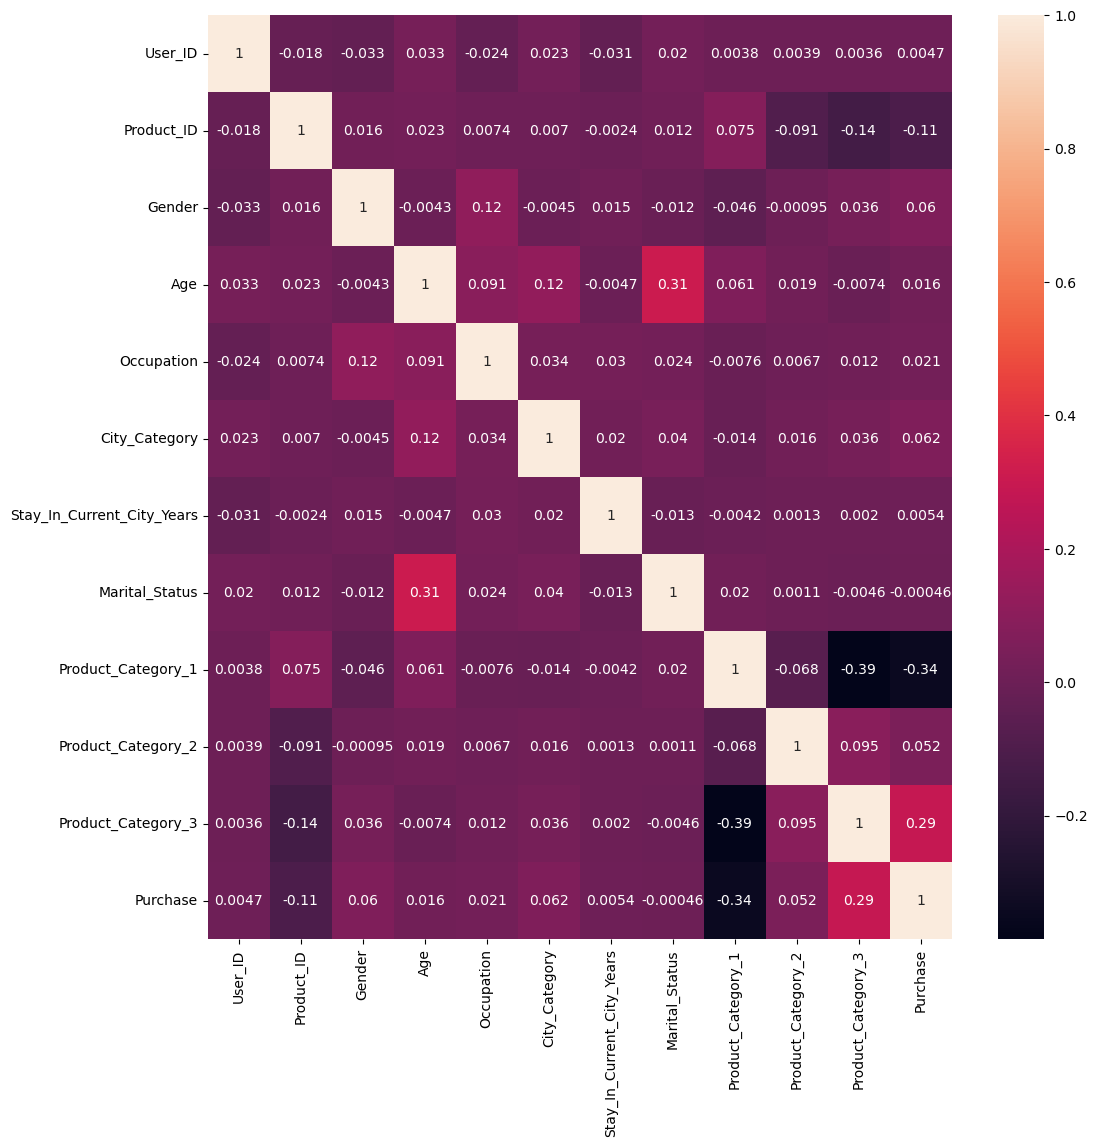

In [55]:
plt.figure(figsize=(12,12))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

## Scaling

In [56]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [57]:
scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(df_train.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'])

In [58]:
df_scaled

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.000000,0.185124,0.0,0.000000,0.50,0.0,0.50,0.0,0.105263,0.000000,0.000000,0.348992
1,0.000000,0.654545,0.0,0.000000,0.50,0.0,0.50,0.0,0.000000,0.333333,0.777778,0.634181
2,0.000000,0.234711,0.0,0.000000,0.50,0.0,0.50,0.0,0.578947,0.000000,0.000000,0.058875
3,0.000000,0.228099,0.0,0.000000,0.50,0.0,0.50,0.0,0.578947,0.777778,0.000000,0.043634
4,0.000166,0.753168,1.0,1.000000,0.80,1.0,1.00,0.0,0.368421,0.000000,0.000000,0.332248
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,0.998841,0.982645,1.0,0.833333,0.65,0.5,0.25,1.0,1.000000,0.000000,0.000000,0.014865
550064,0.999172,0.982920,0.0,0.333333,0.05,1.0,0.75,0.0,1.000000,0.000000,0.000000,0.014990
550065,0.999338,0.982920,0.0,0.333333,0.75,0.5,1.00,1.0,1.000000,0.000000,0.000000,0.005219
550066,0.999669,0.982920,0.0,1.000000,0.05,1.0,0.50,0.0,1.000000,0.000000,0.000000,0.014740


## Test and Train

### Without Scaled

In [59]:
X=df_train.drop(columns = ['User_ID','Purchase','Product_Category_3']) #feature variable
Y=df_train['Purchase'] #target

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, random_state=42)

Y_train=Y_train.values.reshape(-1,1)
Y_test=Y_test.values.reshape(-1,1)

In [61]:
X_train

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
178247,2228,1,5,7,1,3.0,1,1,15.0
196647,1305,1,1,12,2,4.0,0,5,0.0
418590,2782,1,2,5,1,1.0,0,8,14.0
408727,2631,1,1,4,1,2.0,0,8,0.0
216416,485,1,1,4,1,1.0,0,1,8.0
...,...,...,...,...,...,...,...,...,...
110268,398,1,4,17,2,2.0,0,5,0.0
259178,220,1,2,14,2,2.0,1,5,0.0
365838,3056,0,1,1,1,1.0,0,5,0.0
131932,16,0,1,4,1,2.0,0,8,14.0


In [62]:
Y_train

array([[7800],
       [8677],
       [7966],
       ...,
       [6954],
       [6151],
       [7146]], dtype=int64)

### With Scaled

In [63]:
X_scaled=df_scaled.drop(columns = ['User_ID','Purchase','Product_Category_3']) #feature variable
Y_scaled=df_scaled['Purchase'] #target

In [64]:
from sklearn.model_selection import train_test_split
X_scaled_train, X_scaled_test, Y_scaled_train, Y_scaled_test= train_test_split(X_scaled, Y_scaled, test_size= 0.2, random_state=42)

Y_scaled_train=Y_scaled_train.values.reshape(-1,1)
Y_scaled_test=Y_scaled_test.values.reshape(-1,1)

In [65]:
X_scaled_train

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
178247,0.613774,1.0,0.833333,0.35,0.5,0.75,1.0,0.000000,0.833333
196647,0.359504,1.0,0.166667,0.60,1.0,1.00,0.0,0.210526,0.000000
418590,0.766391,1.0,0.333333,0.25,0.5,0.25,0.0,0.368421,0.777778
408727,0.724793,1.0,0.166667,0.20,0.5,0.50,0.0,0.368421,0.000000
216416,0.133609,1.0,0.166667,0.20,0.5,0.25,0.0,0.000000,0.444444
...,...,...,...,...,...,...,...,...,...
110268,0.109642,1.0,0.666667,0.85,1.0,0.50,0.0,0.210526,0.000000
259178,0.060606,1.0,0.333333,0.70,1.0,0.50,1.0,0.210526,0.000000
365838,0.841873,0.0,0.166667,0.05,0.5,0.25,0.0,0.210526,0.000000
131932,0.004408,0.0,0.166667,0.20,0.5,0.50,0.0,0.368421,0.777778


In [66]:
Y_scaled_train

array([[0.32519103],
       [0.36181051],
       [0.33212243],
       ...,
       [0.28986597],
       [0.25633638],
       [0.297883  ]])

# d) Modelling and Prediction

## Models

### Linear Regression

#### Without Scaled

In [67]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train) #training

LinearRegression()

In [68]:
print(lr.coef_)
print(lr.intercept_)


#y=mX + c
#y=m1X1+m2X2+...m5X5+c

[[-4.16742055e-01  5.35138825e+02  1.18232251e+02  6.43622950e+00
   3.49633383e+02  6.57244413e+00 -5.11713913e+01 -4.28127019e+02
   1.68117334e+01]]
[11073.00619179]


In [69]:
Y_train_pred=lr.predict(X_train)
Y_test_pred=lr.predict(X_test)

In [70]:
def Print_train_metrics():
    print("Train Set:")
    print("Rsquared = ",r2_score(Y_train,Y_train_pred))
    print("Mean Squared Error = ",mean_squared_error(Y_train,Y_train_pred))
    print("Root mean squared error = ",np.sqrt(mean_squared_error(Y_train,Y_train_pred)))
    print("Mean absolute error= ",mean_absolute_error(Y_train,Y_train_pred))

In [71]:
def Print_test_metrics():
    print("Test Set:")
    print("Rsquared = ",r2_score(Y_test,Y_test_pred))
    print("Mean Squared Error = ",mean_squared_error(Y_test,Y_test_pred))
    print("Root mean squared error = ",np.sqrt(mean_squared_error(Y_test,Y_test_pred)))
    print("Mean absolute error= ",mean_absolute_error(Y_test,Y_test_pred))

In [72]:
Print_train_metrics()

Train Set:
Rsquared =  0.13237270255015143
Mean Squared Error =  21913959.382022895
Root mean squared error =  4681.234813809589
Mean absolute error=  3588.0931155378444


In [73]:
Print_test_metrics()

Test Set:
Rsquared =  0.13144811141616197
Mean Squared Error =  21823391.044059426
Root mean squared error =  4671.551246005916
Mean absolute error=  3581.552426411007


#### With Scaled

In [74]:
from sklearn.linear_model import LinearRegression
lr_scaled=LinearRegression()
lr_scaled.fit(X_scaled_train,Y_scaled_train) #training

LinearRegression()

In [75]:
print(lr.coef_)
print(lr.intercept_)


#y=mX + c
#y=m1X1+m2X2+...m5X5+c

[[-4.16742055e-01  5.35138825e+02  1.18232251e+02  6.43622950e+00
   3.49633383e+02  6.57244413e+00 -5.11713913e+01 -4.28127019e+02
   1.68117334e+01]]
[11073.00619179]


In [76]:
Y_scaled_train_pred=lr_scaled.predict(X_scaled_train)
Y_scaled_test_pred=lr_scaled.predict(X_scaled_test)

In [77]:
def Print_metrics_scaled_train():
    print("Train Set Scaled:")
    print("Rsquared = ",r2_score(Y_scaled_train,Y_scaled_train_pred))
    print("Mean Squared Error = ",mean_squared_error(Y_scaled_train,Y_scaled_train_pred))
    print("Root mean squared error = ",np.sqrt(mean_squared_error(Y_scaled_train,Y_scaled_train_pred)))
    print("Mean absolute error= ",mean_absolute_error(Y_scaled_train,Y_scaled_train_pred))

In [78]:
def Print_metrics_scaled_test():
    print("Test Set Scaled:")
    print("Rsquared = ",r2_score(Y_scaled_test,Y_scaled_test_pred))
    print("Mean Squared Error = ",mean_squared_error(Y_scaled_test,Y_scaled_test_pred))
    print("Root mean squared error = ",np.sqrt(mean_squared_error(Y_scaled_test,Y_scaled_test_pred)))
    print("Mean absolute error= ",mean_absolute_error(Y_scaled_test,Y_scaled_test_pred))

In [79]:
Print_metrics_scaled_train()

Train Set Scaled:
Rsquared =  0.1323727025501521
Mean Squared Error =  0.03820727676809777
Root mean squared error =  0.19546681756272027
Mean absolute error=  0.14982225209978886


In [80]:
Print_metrics_scaled_test()

Test Set Scaled:
Rsquared =  0.13144811141616197
Mean Squared Error =  0.03804936967816152
Root mean squared error =  0.1950624763458147
Mean absolute error=  0.14954914302939606


### Decision Tree Regression

#### Without Scaled

In [81]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

regressor.fit(X_train, Y_train)


DecisionTreeRegressor()

In [82]:
Y_train_pred=regressor.predict(X_train)
Y_test_pred=regressor.predict(X_test)

In [83]:
Print_train_metrics()

Train Set:
Rsquared =  0.9672057484788787
Mean Squared Error =  828295.6263708771
Root mean squared error =  910.1074806696608
Mean absolute error=  287.92834300438835


In [84]:
Print_test_metrics()

Test Set:
Rsquared =  0.44892586265304346
Mean Squared Error =  13846387.937972335
Root mean squared error =  3721.073492686262
Mean absolute error=  2630.3792272036953


#### With Scaled

In [85]:
regressor_sc = DecisionTreeRegressor()

regressor_sc.fit(X_scaled_train, Y_scaled_train)

DecisionTreeRegressor()

In [86]:
Y_scaled_train_pred=regressor_sc.predict(X_scaled_train)
Y_scaled_test_pred=regressor_sc.predict(X_scaled_test)

In [87]:
Print_metrics_scaled_train()

Train Set Scaled:
Rsquared =  0.9672057484788787
Mean Squared Error =  0.0014441443324257758
Root mean squared error =  0.03800189906341229
Mean absolute error=  0.012022562236602299


In [88]:
Print_metrics_scaled_test()

Test Set Scaled:
Rsquared =  0.44975314727971205
Mean Squared Error =  0.024105118172658497
Root mean squared error =  0.1552582306116442
Mean absolute error=  0.10977860917359689


### Random Forest Regression

#### Without Scaled

In [89]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor with 100 trees
RF = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
RF.fit(X_train, Y_train)


C:\Users\srika\AppData\Local\Temp\ipykernel_16432\1401001350.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, Y_train)


RandomForestRegressor()

In [90]:
Y_train_pred=RF.predict(X_train)
Y_test_pred=RF.predict(X_test)

In [91]:
Print_train_metrics()

Train Set:
Rsquared =  0.9320695798115266
Mean Squared Error =  1715741.8550446208
Root mean squared error =  1309.8632963193604
Mean absolute error=  902.978471447229


In [92]:
Print_test_metrics()

Test Set:
Rsquared =  0.6666076336904615
Mean Squared Error =  8376876.588156842
Root mean squared error =  2894.2834325885988
Mean absolute error=  2119.69137661068


#### With Scaled

In [93]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor with 100 trees
RF_sc = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
RF_sc.fit(X_scaled_train, Y_scaled_train)

C:\Users\srika\AppData\Local\Temp\ipykernel_16432\493464871.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_sc.fit(X_scaled_train, Y_scaled_train)


RandomForestRegressor()

In [94]:
Y_scaled_train_pred=RF_sc.predict(X_scaled_train)
Y_scaled_test_pred=RF_sc.predict(X_scaled_test)

In [95]:
Print_metrics_scaled_train()

Train Set Scaled:
Rsquared =  0.9321600841320333
Mean Squared Error =  0.0029874330246527276
Root mean squared error =  0.05465741509303863
Mean absolute error=  0.0376893529330323


In [96]:
Print_metrics_scaled_test()

Test Set Scaled:
Rsquared =  0.6668840890484613
Mean Squared Error =  0.014593083738656993
Root mean squared error =  0.12080183665266432
Mean absolute error=  0.08844788680041368


## Prediction

In [97]:
df_test['Product_Category_2'] = df_test['Product_Category_2'].fillna(0)

In [98]:
df_test['Stay_In_Current_City_Years'] = pd.to_numeric(df_test['Stay_In_Current_City_Years'], errors='coerce')
df_test['Stay_In_Current_City_Years'] = df_test['Stay_In_Current_City_Years'].fillna(4)

In [99]:
le = LabelEncoder()
df_test['City_Category'] = le.fit_transform(df_test['City_Category'])
df_test['Gender'] = le.fit_transform(df_test['Gender'])
df_test['Age'] = le.fit_transform(df_test['Age'])
df_test['Product_ID'] = le.fit_transform(df_test['Product_ID'])

In [100]:
df_scaled = scaler.fit_transform(df_test.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'])

In [101]:
X=df_test.drop(columns = ['User_ID','Product_Category_3']) #feature variable

In [102]:
Y_test=RF.predict(X)

In [103]:
df = df_test

In [104]:
df['Purchase'] = np.round(Y_test) 

df is the data which is been provided to predict purchase.

# e) Results

## Predict the amount of purchase based on the given features?

Linear Regression:

1. Rsquared =  0.13144811141616197
2. Mean Squared Error =  21823391.044059426
3. Root mean squared error =  4671.551246005916
4. Mean absolute error=  3581.552426411007

Decision tree Regression:

1. Rsquared =  0.4489458571631929
2. Mean Squared Error =  13845885.55231241
3. Root mean squared error =  3721.0059865999156
4. Mean absolute error=  2629.3799049962176

Random Forest Regression:

1. Rsquared =  0.6670970626453387
2. Mean Squared Error =  8364579.108166343
3. Root mean squared error =  2892.1582093942134
4. Mean absolute error=  2117.931680304506

## How does gender or age affect the amount of purchase?

1. Male customers in age brackets of 26-35, 36-45 and 18 -25 have more prurchases of around 60% of total purchases.
2. Female customers in age brackets of 26-35, 36-45 and 18-25 have more purchases of around 17% of total purchases.

## What are the most purchased products?

1. Top 10 products with respect to quantity
    1. P00265242
    2. P00025442
    3. P00110742
    4. P00112142
    5. P00057642
    6. P00184942
    7. P00046742
    8. P00058042
    9. P00059442
    10. P00145042

2. Top Product with respect to highest individual purchase(23961) and have contribution 0.39% in total purchase
    1. P00052842
    
3. The maximum individual contribution of Product_ID in terms of total Purcahse is 0.54% in total purcahse
    1. 249